### 10 Academy: Artificial Intelligence Mastery
### Stock Analysis


In [ ]:
# import yfinance as yf: yfinance is used to fetch data from yahoo finance using tickers
# since we have the data we can comment 
import talib as ta
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


Sentiment_analysis=pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Task1_sentiment_data\sentiment_analysis_results.csv')    
aapl_data = pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Data\yfinance_data\AAPL_historical_data.csv')
amzn_data = pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Data\yfinance_data\AMZN_historical_data.csv')
goog_data = pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Data\yfinance_data\GOOG_historical_data.csv')
meta_data = pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Data\yfinance_data\META_historical_data.csv')
msft_data = pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Data\yfinance_data\MSFT_historical_data.csv')
nvda_data = pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Data\yfinance_data\NVDA_historical_data.csv')
tsla_data = pd.read_csv(r'C:\Users\ethio\Desktop\Tenx.AIM3 -ET\Week1\Data\yfinance_data\TSLA_historical_data.csv')


# Read and display the first few rows of each file


Sentiment_analysis.head()
print("AAPL Data:")
print(aapl_data.head())

print("\nAMZN Data:")
print(amzn_data.head())

print("\nGOOG Data:")
print(goog_data.head())

print("\nMETA Data:")
print(meta_data.head())

print("\nMSFT Data:")
print(msft_data.head())

print("\nNVDA Data:")
print(nvda_data.head())

AAPL Data:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

AMZN Data:
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-

As it can be seen above the data includes columns like Open, High, Low, Close, and Volume.

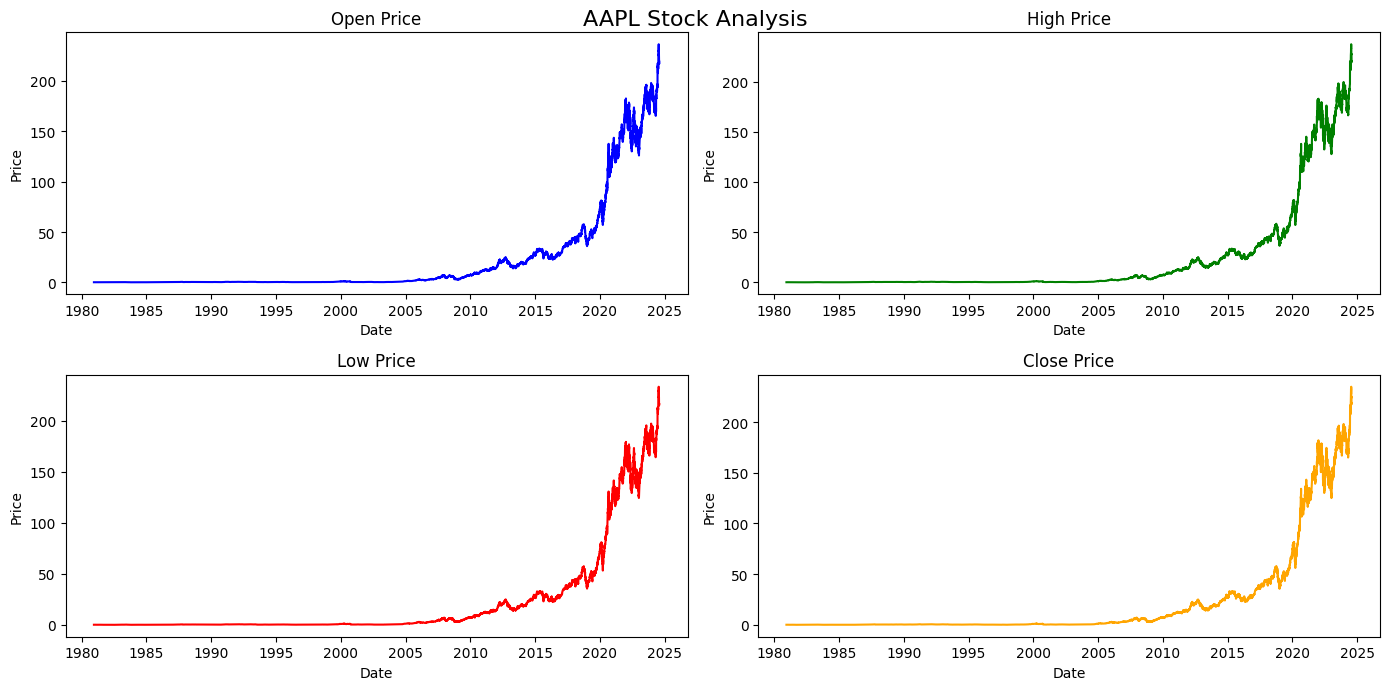

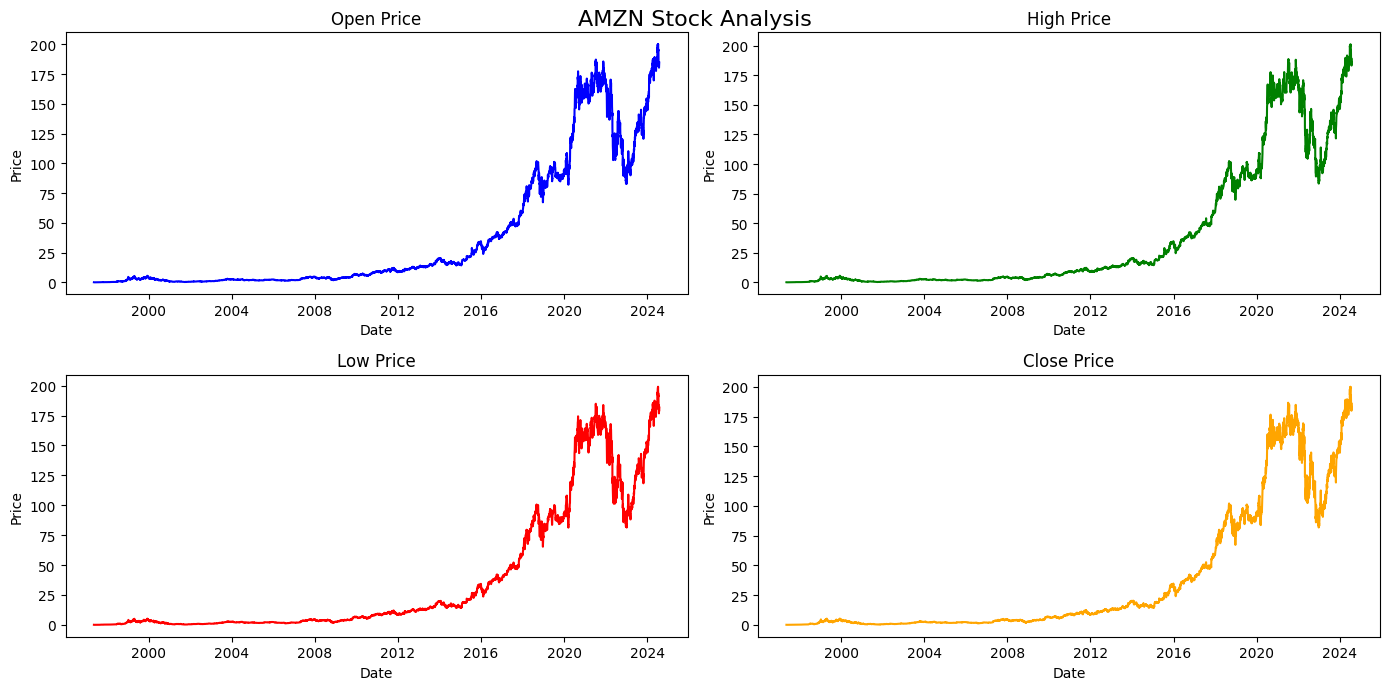

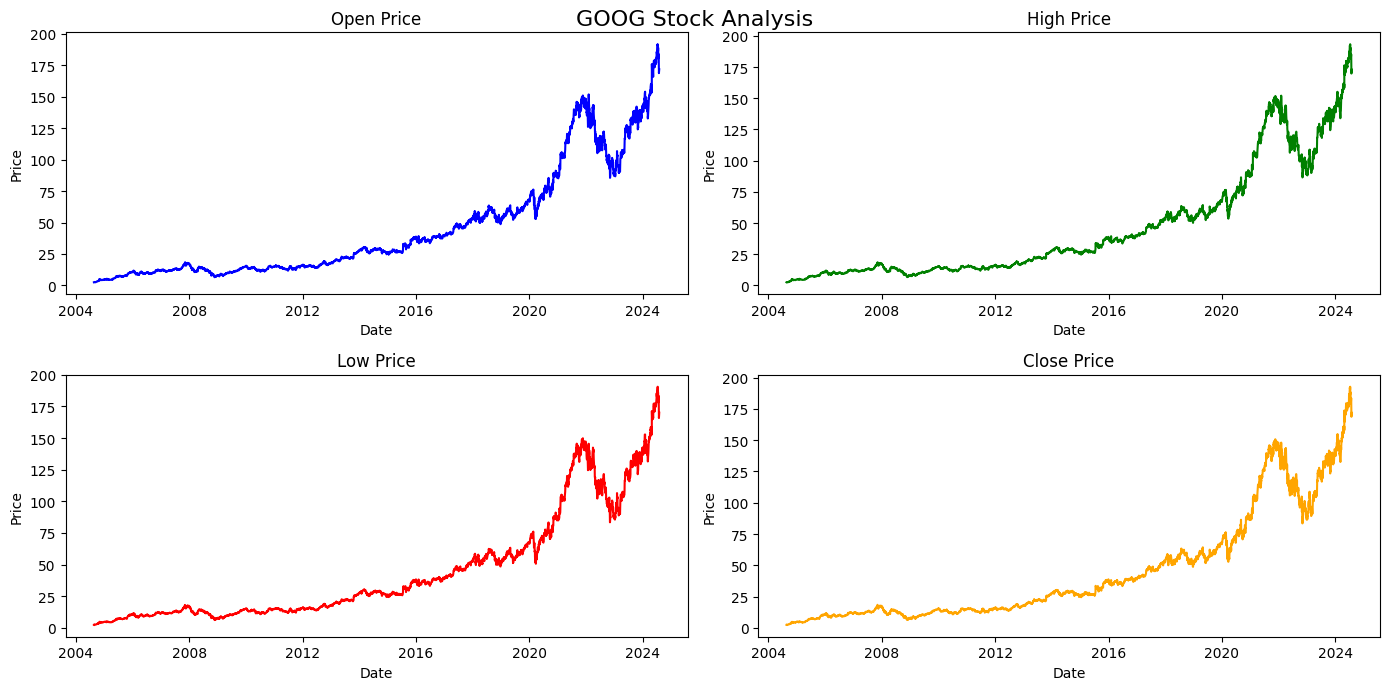

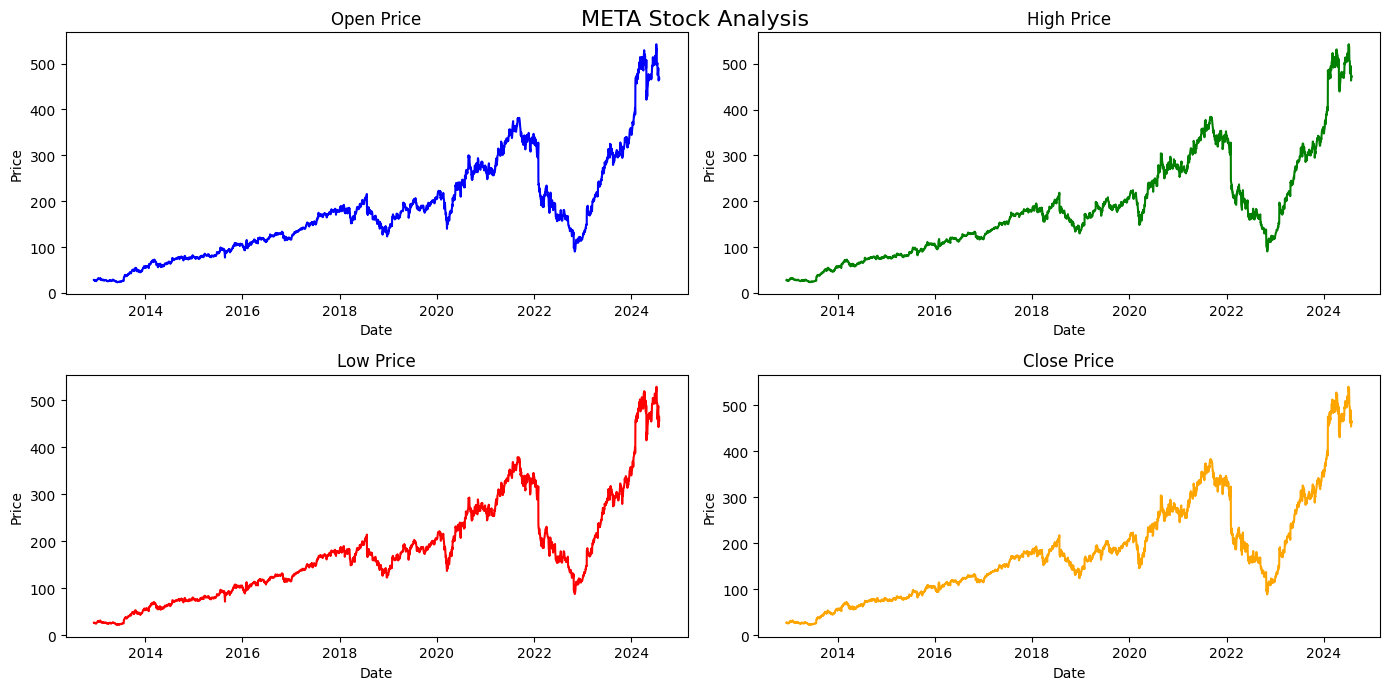

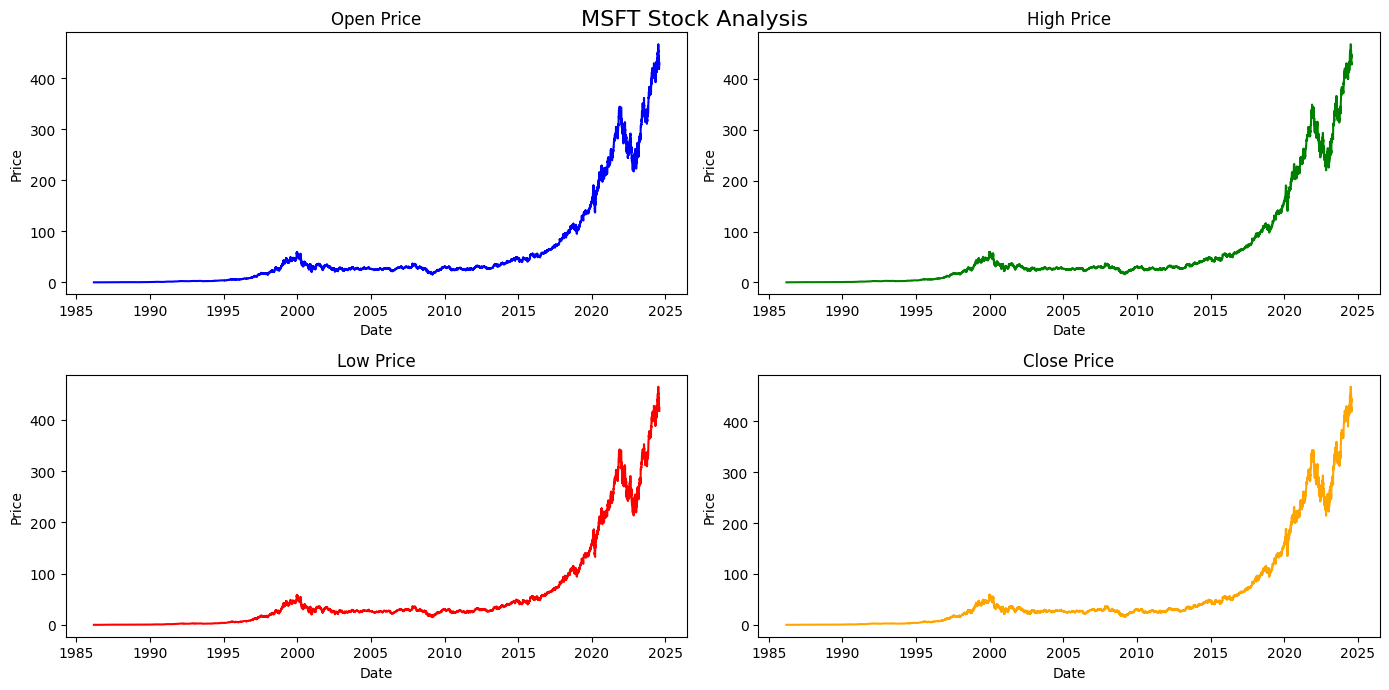

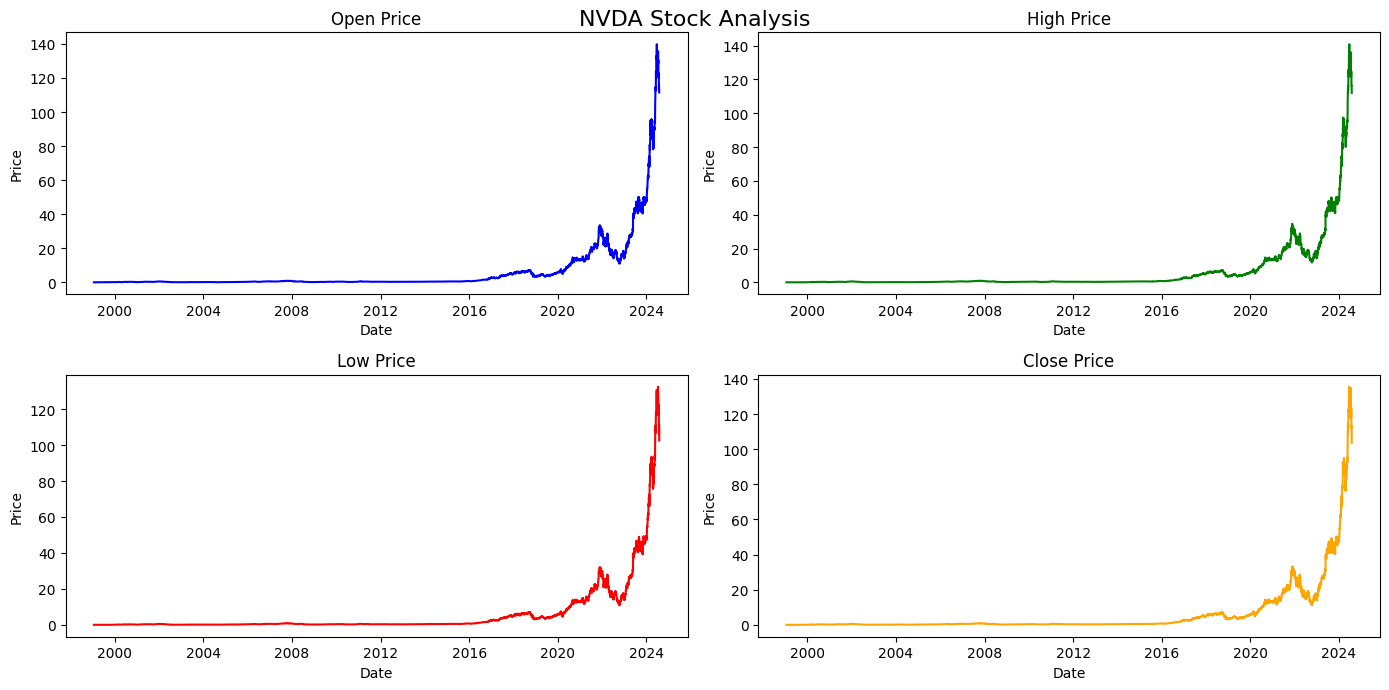

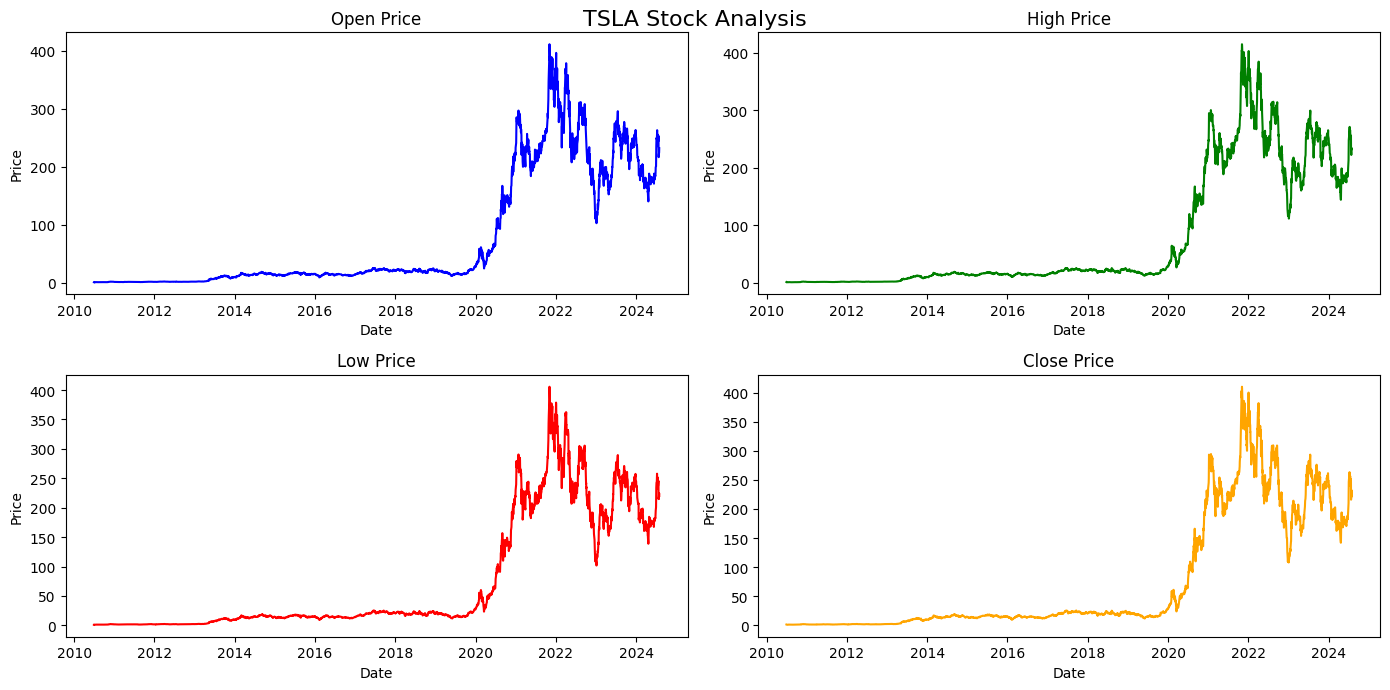

In [41]:
def plot_stock_data(data, title):
    plt.figure(figsize=(14, 7))
    
    plt.subplot(2, 2, 1)
    plt.plot(pd.to_datetime(data['Date']), data['Open'], label='Open', color='blue')
    plt.title('Open Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    plt.subplot(2, 2, 2)
    plt.plot(pd.to_datetime(data['Date']), data['High'], label='High', color='green')
    plt.title('High Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    plt.subplot(2, 2, 3)
    plt.plot(pd.to_datetime(data['Date']), data['Low'], label='Low', color='red')
    plt.title('Low Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    plt.subplot(2, 2, 4)
    plt.plot(pd.to_datetime(data['Date']), data['Close'], label='Close', color='orange')
    plt.title('Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.show()

# Plot data for each stock
plot_stock_data(aapl_data, 'AAPL Stock Analysis')
plot_stock_data(amzn_data, 'AMZN Stock Analysis')
plot_stock_data(goog_data, 'GOOG Stock Analysis')
plot_stock_data(meta_data, 'META Stock Analysis')
plot_stock_data(msft_data, 'MSFT Stock Analysis')
plot_stock_data(nvda_data, 'NVDA Stock Analysis')
plot_stock_data(tsla_data, 'TSLA Stock Analysis')



The dataset shows that the price movement for Apple Inc. (AAPL), as well as for other stocks, remained relatively stable from the start of the data range in 1981 until approximately 2008-2011. Significant changes began around 2011, coinciding with the rise of digital news platforms that started influencing the market. Additionally, the COVID-19 pandemic in 2020 also had a notable impact on price movements. These variations in stock prices can be correlated with data from articles and headlines during these periods.

Let's analyze the stocks from January 1, 2020, to December 31, 2020, and retrieve data for this period.


In [42]:
start_date = '2020-01-01'
end_date = '2020-12-31'
def filter_data(data, start_date, end_date):
    return data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

aapl_data_2020 = filter_data(aapl_data, start_date, end_date)
amzn_data_2020 = filter_data(amzn_data, start_date, end_date)
goog_data_2020 = filter_data(goog_data, start_date, end_date)
meta_data_2020 = filter_data(meta_data, start_date, end_date)
msft_data_2020 = filter_data(msft_data, start_date, end_date)
nvda_data_2020 = filter_data(nvda_data, start_date, end_date)
tsla_data_2020 = filter_data(tsla_data, start_date, end_date)

# Function to plot stock data on subplots
aapl_data_2020 = filter_data(aapl_data, start_date, end_date)
amzn_data_2020 = filter_data(amzn_data, start_date, end_date)
goog_data_2020 = filter_data(goog_data, start_date, end_date)
meta_data_2020 = filter_data(meta_data, start_date, end_date)
msft_data_2020 = filter_data(msft_data, start_date, end_date)
nvda_data_2020 = filter_data(nvda_data, start_date, end_date)
tsla_data_2020 = filter_data(tsla_data, start_date, end_date)

# Display the first few rows of each filtered dataset
print("AAPL Data (2020) - First few rows:")
print(aapl_data_2020.head())
print("\nAMZN Data (2020) - First few rows:")
print(amzn_data_2020.head())
print("\nGOOG Data (2020) - First few rows:")
print(goog_data_2020.head())
print("\nMETA Data (2020) - First few rows:")
print(meta_data_2020.head())
print("\nMSFT Data (2020) - First few rows:")
print(msft_data_2020.head())
print("\nNVDA Data (2020) - First few rows:")
print(nvda_data_2020.head())
print("\nTSLA Data (2020) - First few rows:")
print(tsla_data_2020.head())

AAPL Data (2020) - First few rows:
            Date       Open       High        Low      Close  Adj Close  \
9847  2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876099   
9848  2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167595   
9849  2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661   
9850  2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536   
9851  2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208   

         Volume  Dividends  Stock Splits  
9847  135480400        0.0           0.0  
9848  146322800        0.0           0.0  
9849  118387200        0.0           0.0  
9850  108872000        0.0           0.0  
9851  132079200        0.0           0.0  

AMZN Data (2020) - First few rows:
            Date       Open       High        Low      Close  Adj Close  \
5695  2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497   
5696  2020-01-03  93.224998  94.309998  93.224998  93.748497  93.74849


#### Technical Analysis(TA-LIB)

Next, examining the technical indicators RSI, SMA, EMA, and MACD from January 1, 2020, to December 31, 2020, in order to gather the pertinent information. These indicators were selected based on their specific purposes: RSI detects overbought or oversold conditions, SMA offers a clear picture of general trends, EMA provides a quick trend analysis, and MACD indicates variations in trend strength and direction. These tools will assist in our comprehension of market trends in the volatile year of 2020.


In [43]:
def calculate_technical_indicators(data):
    data_copy = data.copy()

    # Calculate technical indicators and add them to the copy
    data_copy['SMA_20'] = ta.SMA(data_copy['Close'], timeperiod=20)
    data_copy['EMA_20'] = ta.EMA(data_copy['Close'], timeperiod=20)
    data_copy['EMA_50'] = ta.EMA(data_copy['Close'], timeperiod=50)
    data_copy['RSI'] = ta.RSI(data_copy['Close'], timeperiod=14)
    macd, macdsignal, macdhist = ta.MACD(data_copy['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    data_copy['MACD'] = macd
    data_copy['MACD_Signal'] = macdsignal
    data_copy['MACD_Hist'] = macdhist

    return data_copy

# Apply the function to each DataFrame
aapl_data_2020 = calculate_technical_indicators(aapl_data_2020)
amzn_data_2020 = calculate_technical_indicators(amzn_data_2020)
goog_data_2020 = calculate_technical_indicators(goog_data_2020)
meta_data_2020 = calculate_technical_indicators(meta_data_2020)
msft_data_2020 = calculate_technical_indicators(msft_data_2020)
nvda_data_2020 = calculate_technical_indicators(nvda_data_2020)
tsla_data_2020 = calculate_technical_indicators(tsla_data_2020)

Visualizing TA-indicators

In [44]:
def plot_stock_data(data, symbol):
    plt.figure(figsize=(14, 10))

    # Plot the Close price and indicators
    plt.subplot(3, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
    plt.plot(data['EMA_20'], label='EMA 20', color='red', linestyle='--')
    plt.plot(data['EMA_50'], label='EMA 50', color='green', linestyle='--')
    plt.title(f'{symbol} Price and Indicators')
    plt.legend()

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(data['RSI'], label='RSI', color='purple')
    plt.axhline(y=70, color='red', linestyle='--', label='Overbought')
    plt.axhline(y=30, color='green', linestyle='--', label='Oversold')
    plt.title('Relative Strength Index (RSI)')
    plt.legend()

    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(data['MACD'], label='MACD', color='blue')
    plt.plot(data['MACD_Signal'], label='MACD Signal', color='red')
    plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
    plt.title('MACD')
    plt.legend()

    plt.tight_layout()
    plt.show()
    

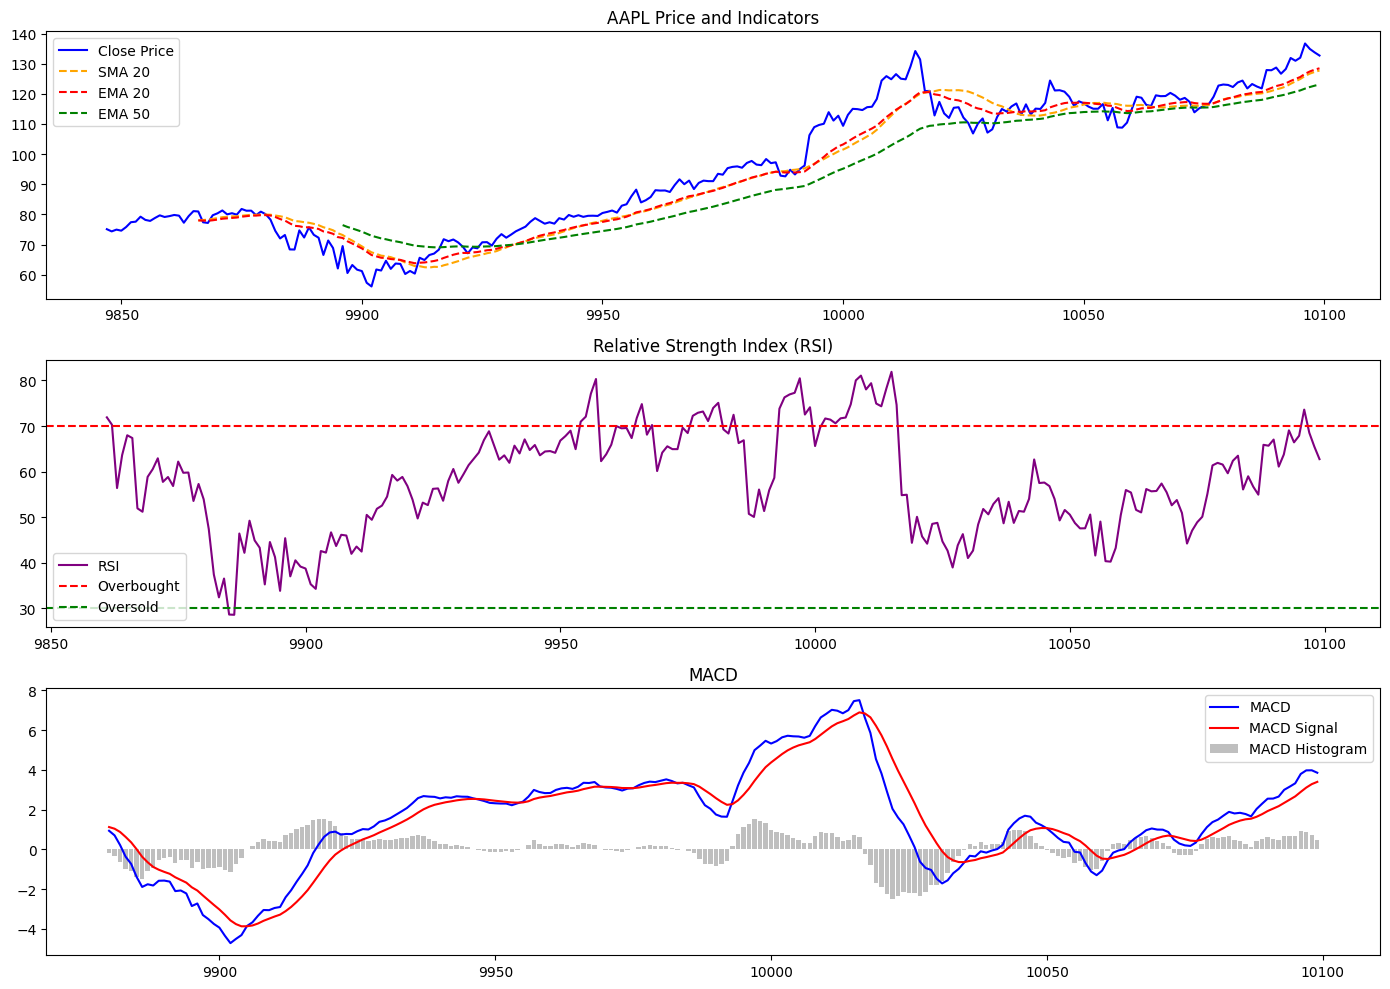

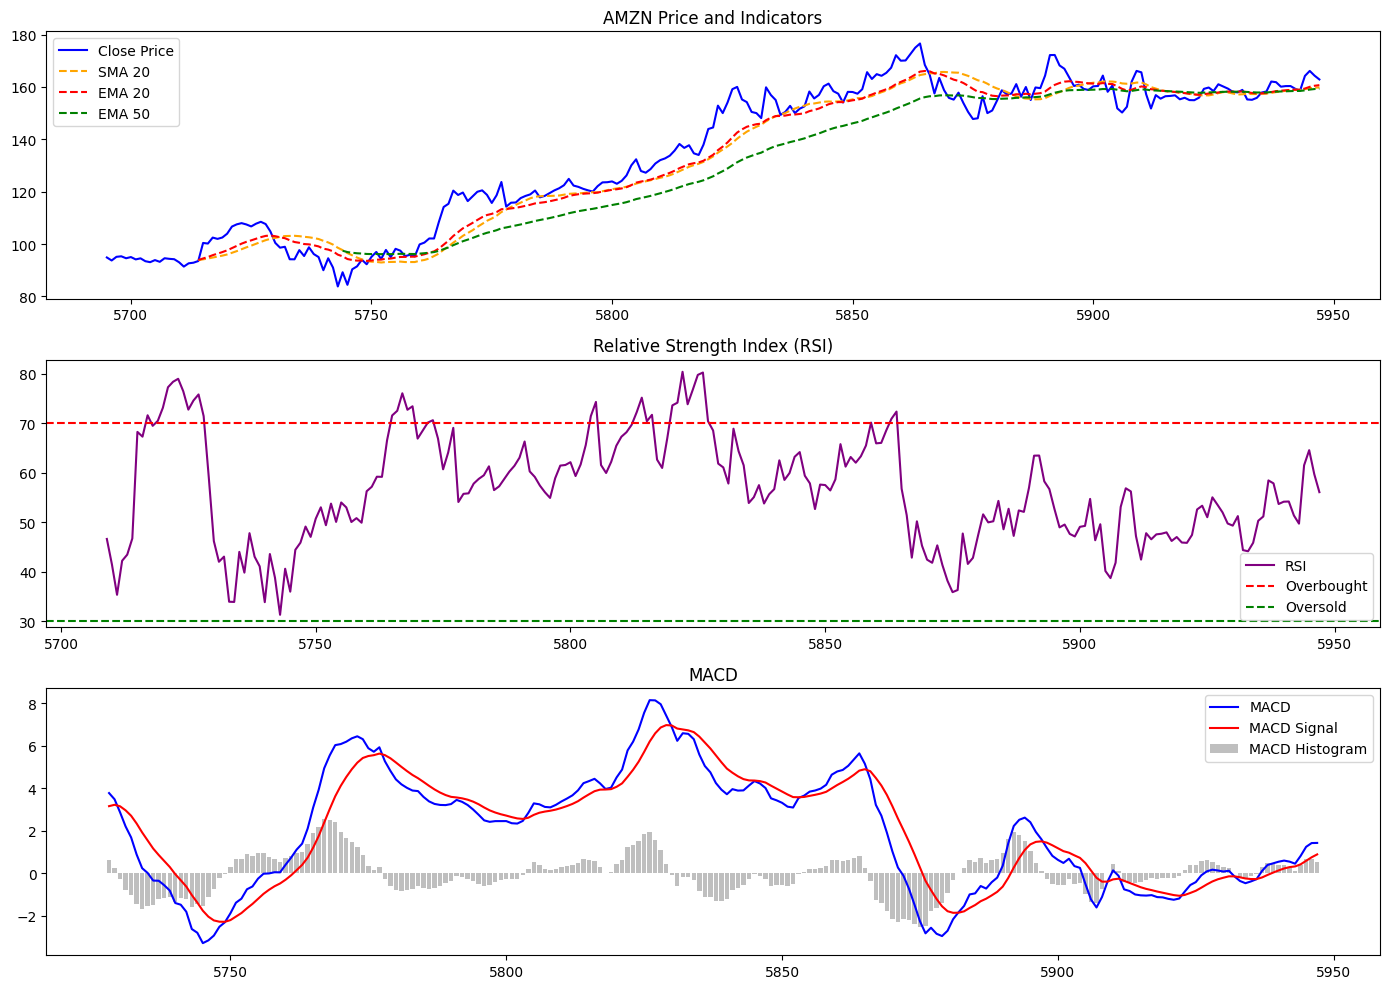

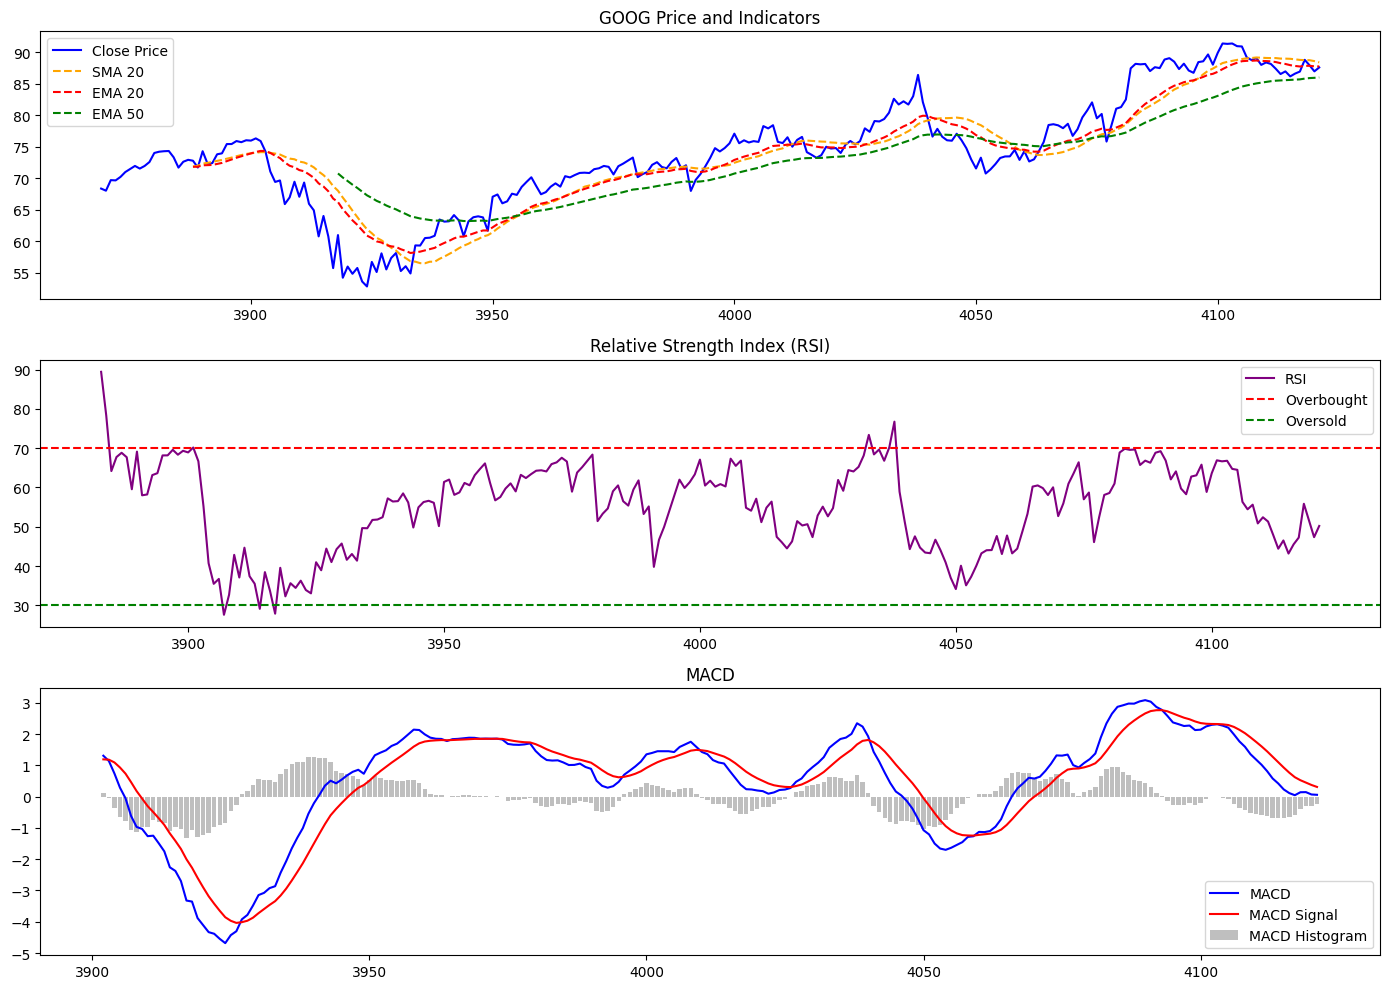

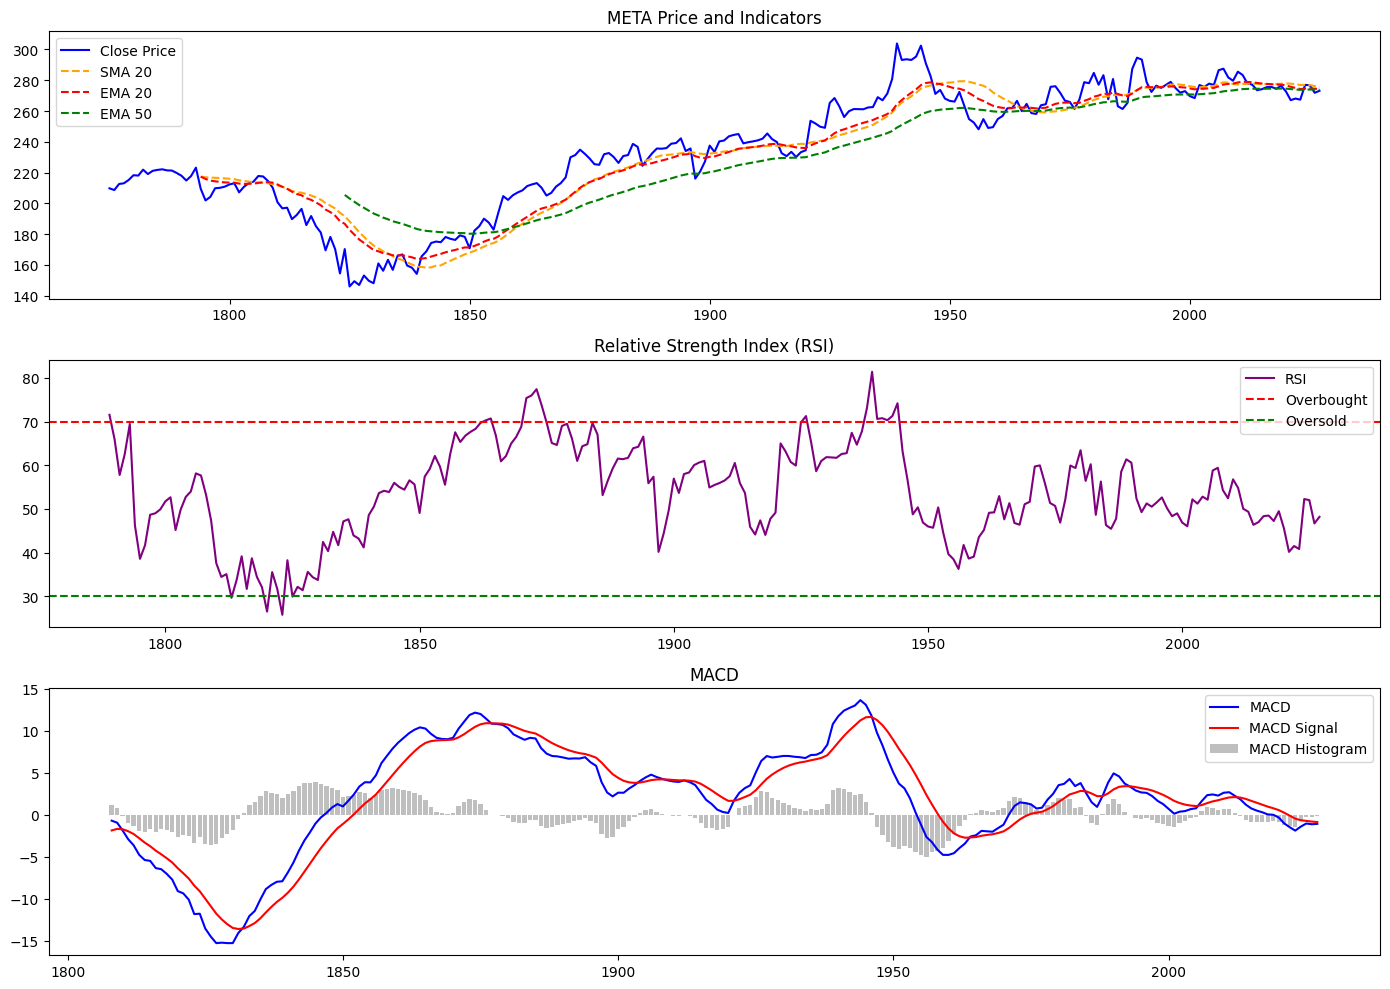

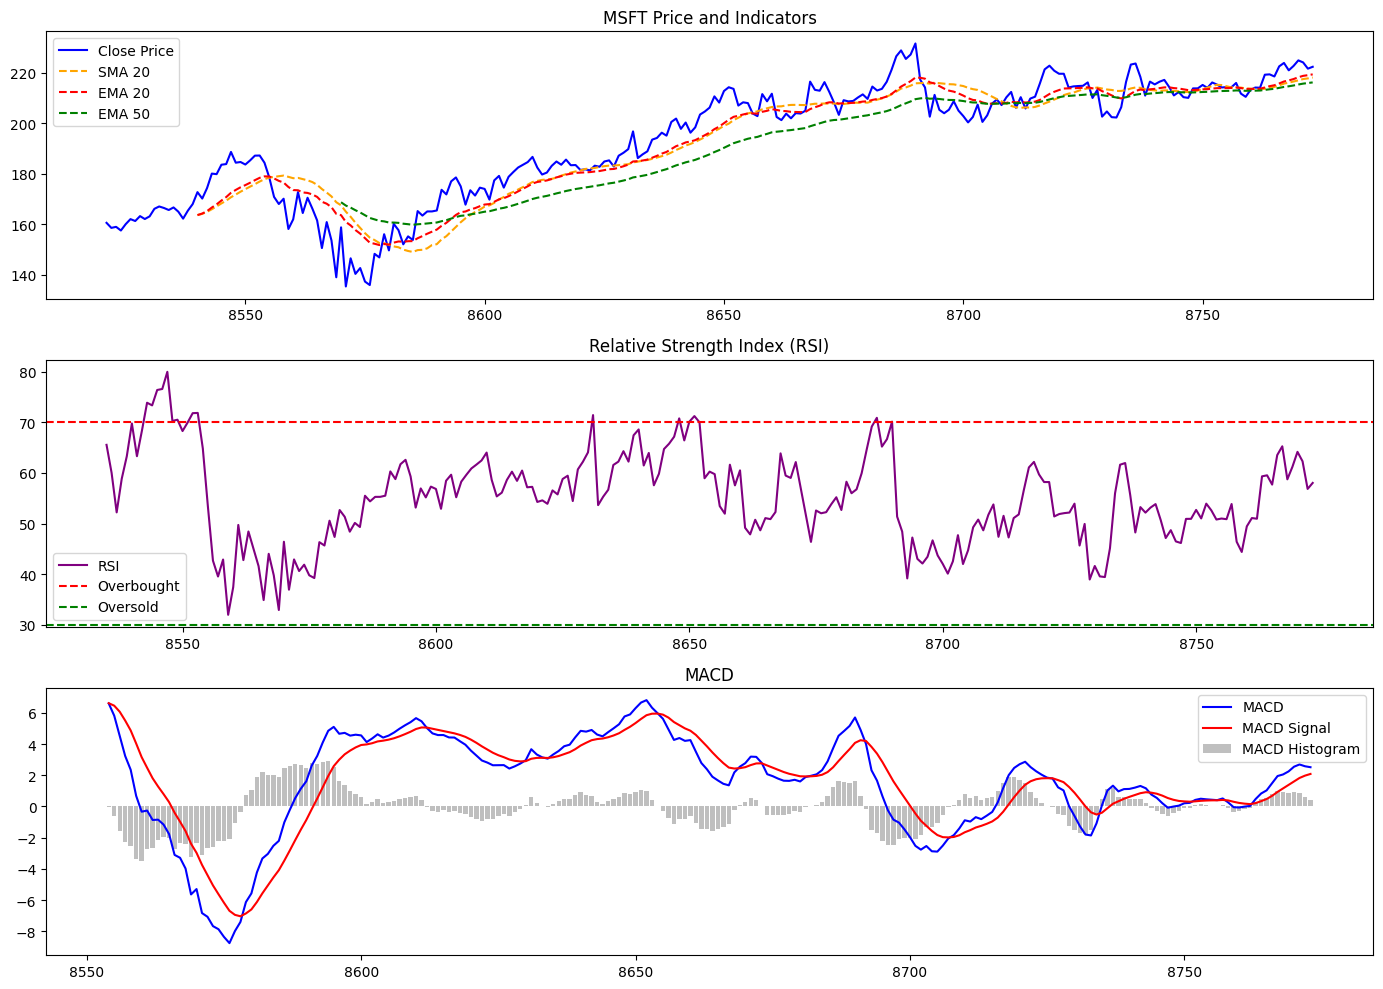

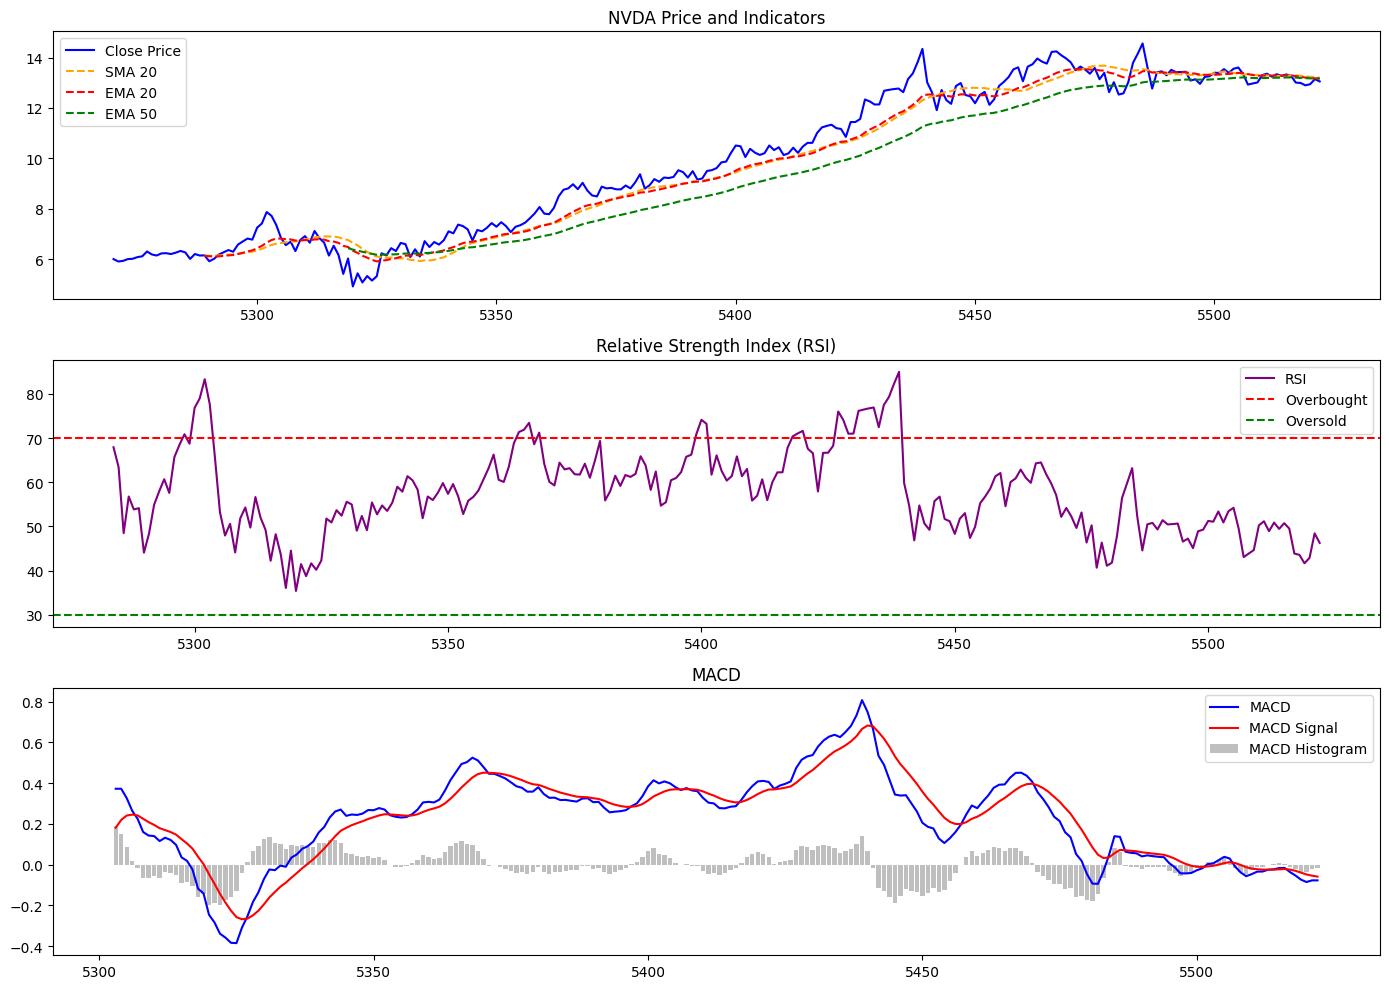

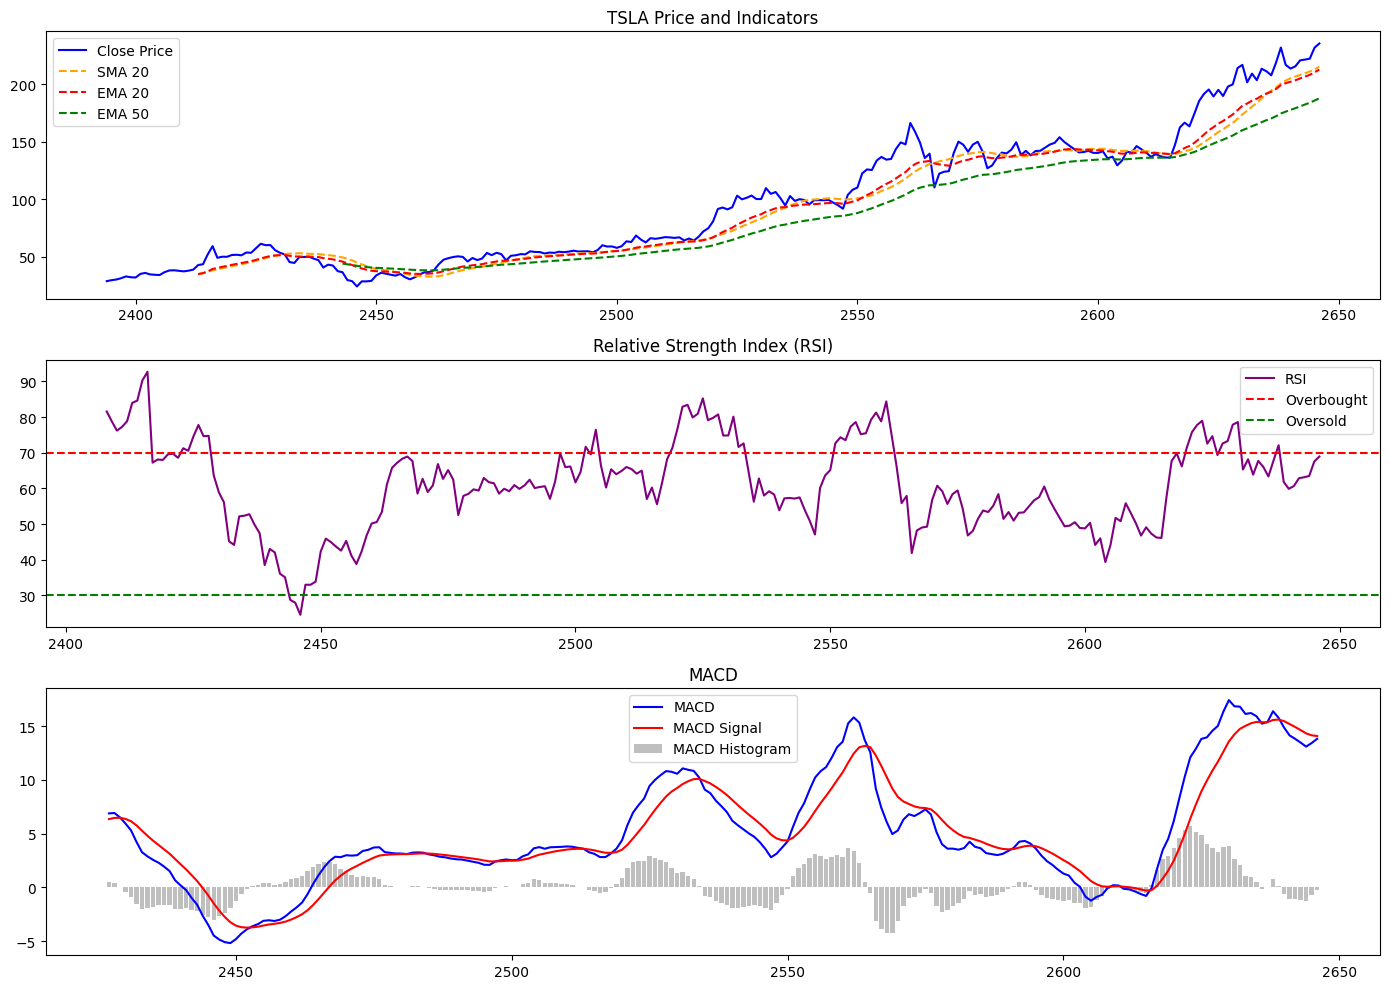

In [45]:
plot_stock_data(aapl_data_2020, 'AAPL')
plot_stock_data(amzn_data_2020, 'AMZN')
plot_stock_data(goog_data_2020, 'GOOG')
plot_stock_data(meta_data_2020, 'META')
plot_stock_data(msft_data_2020, 'MSFT')
plot_stock_data(nvda_data_2020, 'NVDA')
plot_stock_data(tsla_data_2020, 'TSLA')


#### Portfolio Analysis

A thorough comprehension of market and asset class fundamentals is essential in investment management decision-making, with portfolio analysis being a key component.The main objective of evaluating a portfolio is to determine if it has met expectations during a specific time frame, the amount of risk taken, and how returns are attributed.Investors should carefully evaluate factors like investment style, objectives, risk budget, and portfolio composition as portfolios can vary greatly.

Mean Variance Optimization Method (MVO)

    1.Portfolio Weights



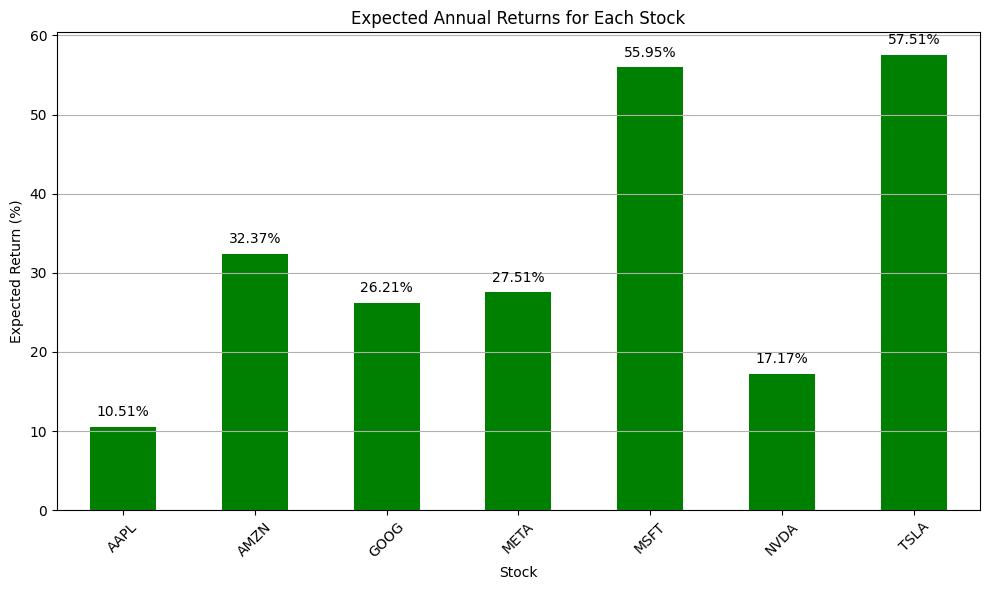

Expected Returns (in %):
AAPL    10.514394
AMZN    32.370121
GOOG    26.212406
META    27.512473
MSFT    55.946050
NVDA    17.167774
TSLA    57.509562
dtype: float64

Covariance Matrix:
          AAPL      AMZN      GOOG      META      MSFT      NVDA      TSLA
AAPL  0.237056  0.003939  0.001546  0.000297 -0.000115 -0.001071 -0.008209
AMZN  0.003939  0.576721 -0.000693 -0.004922  0.000591  0.026099  0.005092
GOOG  0.001546 -0.000693  0.106688  0.000259 -0.003570 -0.000554  0.000108
META  0.000297 -0.004922  0.000259  0.151151  0.000834  0.001430  0.004366
MSFT -0.000115  0.000591 -0.003570  0.000834  0.151828  0.006654 -0.001194
NVDA -0.001071  0.026099 -0.000554  0.001430  0.006654  0.544547 -0.008568
TSLA -0.008209  0.005092  0.000108  0.004366 -0.001194 -0.008568  0.317955


In [46]:
# Create the DataFrame with closing prices
stock_data = pd.DataFrame({
    'AAPL': aapl_data['Close'],
    'AMZN': amzn_data['Close'],
    'GOOG': goog_data['Close'],
    'META': meta_data['Close'],
    'MSFT': msft_data['Close'],
    'NVDA': nvda_data['Close'],
    'TSLA': tsla_data['Close']
})

# Drop any rows with missing values
stock_data = stock_data.dropna()

# Calculate expected returns and covariance matrix
expected_returns = expected_returns.mean_historical_return(stock_data)
cov_matrix = risk_models.CovarianceShrinkage(stock_data).ledoit_wolf()

# Optimize the portfolio to maximize the Sharpe Ratio
ef = EfficientFrontier(expected_returns, cov_matrix)
weights = ef.max_sharpe()  # Maximize the Sharpe Ratio
cleaned_weights = ef.clean_weights()

# Convert expected returns to percentage
expected_returns_pct = expected_returns * 100

# Plot Expected Returns in Percentage
plt.figure(figsize=(10, 6))
expected_returns_pct.plot(kind='bar', color='green')  
plt.title('Expected Annual Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Expected Return (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate bars with percentage values
for i, value in enumerate(expected_returns_pct):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()

# Show plot
plt.show()

# Display the results
print("Expected Returns (in %):")
print(expected_returns_pct)
print("\nCovariance Matrix:")
print(cov_matrix)





The anticipated annual profitability for each stock is shown by the expected returns: Apple Inc. (AAPL) at 10.51%, Amazon (AMZN) at 32.37%, Google (GOOG) at 26.21%, Meta (META) at 27.51%, Microsoft (MSFT) at 55.95%, NVIDIA (NVDA) at 17.17%, and Tesla (TSLA) at 57.51%. This data shows the typical annual returns that investors can anticipate from each stock.

The covariance matrix evaluates the way in which the returns of these stocks are related to one another. The variance of each stock's returns is depicted by the diagonal elements of the matrix, showing the individual risk level associated with each stock. An example is AAPL with a variance of 0.237056, indicating the level of volatility in its returns. The values off the diagonal represent the correlation between stock pairs, like the 0.003939 correlation between AAPL and AMZN, showing how their returns are linked. When stocks' returns have a positive covariance, they increase and decrease in sync, whereas a negative covariance means they move in opposite directions. This matrix is crucial in determining how the mixture of these stocks can impact the risk and return of the entire portfolio, assisting investors in building a diverse portfolio that matches their risk tolerance and investment objectives.


Optimized Portfolio Weights (in %):
AAPL: 3.77%
AMZN: 4.87%
GOOG: 22.70%
META: 15.50%
MSFT: 34.30%
NVDA: 2.25%
TSLA: 16.61%


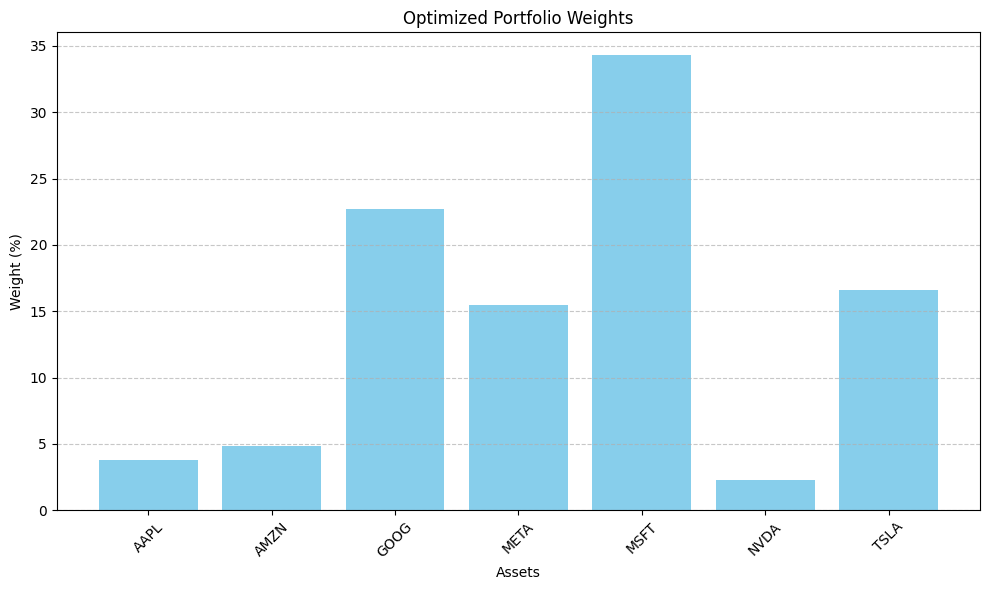

In [47]:
ef = EfficientFrontier(expected_returns, cov_matrix)
weights = ef.max_sharpe()  # Example: Maximize the Sharpe Ratio
cleaned_weights = ef.clean_weights()
percent_weights = {asset: weight * 100 for asset, weight in cleaned_weights.items()}

# Print the optimized portfolio weights as percentages
print('Optimized Portfolio Weights (in %):')
for asset, weight in percent_weights.items():
    print(f"{asset}: {weight:.2f}%")

# Plot the weights
plt.figure(figsize=(10, 6))
plt.bar(percent_weights.keys(), percent_weights.values(), color='skyblue')
plt.xlabel('Assets')
plt.ylabel('Weight (%)')
plt.title('Optimized Portfolio Weights')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



This breakdown indicates that in order to optimize the portfolio's returns, it is recommended to allocate 3.77% to Apple, 4.87% to Amazon, and 22.70% to Google. Meta is allocated 15.50% of the investment, with Microsoft receiving the highest allocation at 34.30%. NVIDIA's portion will decrease to 2.25%, while Tesla's allocation will increase to 16.61%. These percentages show how much of our total investment should be assigned to each stock in order to maximize your portfolio's results.

The bar chart will look tell indicate Google (GOOG) and Microsoft (MSFT) get the largest shares of our investment, and Amazon (AMZN) and NVIDIA (NVDA) get smaller shares.

2. Portfolio Performance



In [48]:
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)

Expected annual return: 41.3%
Annual volatility: 19.4%
Sharpe Ratio: 2.03


It is anticipated that the optimized portfolio will achieve a strong annual return of 41.3%, indicating significant growth potential derived from historical data and the optimization model. Nevertheless, this yield is accompanied by an annual volatility of 19.4%, suggesting that the portfolio's returns are likely to vary greatly from the average, signifying a notable amount of risk. Nevertheless, the portfolio maintains a Sharpe Ratio of 2.03, indicating a solid return considering the level of risk. This proportion indicates that the portfolio is doing very well compared to the level of risk it is facing, with a Sharpe Ratio exceeding 2 being deemed highly favorable. Basically, although the portfolio offers high returns, it also comes with significant fluctuations in returns, yet its overall performance considering risk is quite positive. A Sharpe Ratio higher than 1 is typically seen as positive, suggesting that the portfolio is likely to provide a high return relative to the level of risk involved.


### Reference

1. https://www.investopedia.com/terms/p/portfolio-weight.asp
2. https://www.fe.training/free-resources/portfolio-management/portfolio-analysis/
3. https://www.spiderstrategies.com/kpi/department/finance/
4. https://pypi.org/project/pyportfolioopt/
5. https://ta-lib.org/

